In diesem Notebook wird das zweite Experiment durchgeführt:

Wir untersuchen den Einfluss der menschbedingten Emissionen auf eine Hitzewelle im industriellen Zeitalter.

Wir stellen die Formeln generisch für einen Zeitraum der Länge $\tau$ auf.

### Allgemeine Definition

Schritt 1: Variablen definieren
- $𝑍^∗$ (Klimaindex) = Anzahl an Hitzewellen im Zeitraum der Länge $\tau$ mit Ende im Jahr 2003. In einem Jahr ist eine Hitzewelle passiert, wenn $Z\geq \nu$
- $\nu^∗$ (Schwellwert) = 1
- $Y^∗$ (Antwortvariable) = aktiv, wenn sich mindestens eine Hitzewelle im Zeitraum $2004−\tau \leq t \leq 2003$ vorgekommen ist.

Schritt 2: $p_0, p_1$ bestimmen für die einzelnen Jahre und dann $p_0^*, p_1^*$.
- $p_x^*=P(Z_x^* \geq 1)=1-(1-p_x)^{\tau}$

In [6]:
# für p_0 und p_1 verwenden wir die Werte aus Experiment 1
p0 = 1/1250
p1= 1/125

print("p0", p0)
print("p1", p1)

p0 0.0008
p1 0.008


## Wir berechnen $p_0^*$ und $p_1^*$

Wir berechnen in Abhängigkeit von $\tau$

In [9]:
def calculate(tau):
    p0_star = 1 - (1 - p0) ** tau
    p1_star = 1 - (1 - p1) ** tau
    
    PN_star = 1 - (float(p0_star) / float(p1_star))
    PS_star = 1 - ((1- p1_star) / (1 - p0_star)) ** tau
    return p0_star, p1_star, PN_star, PS_star

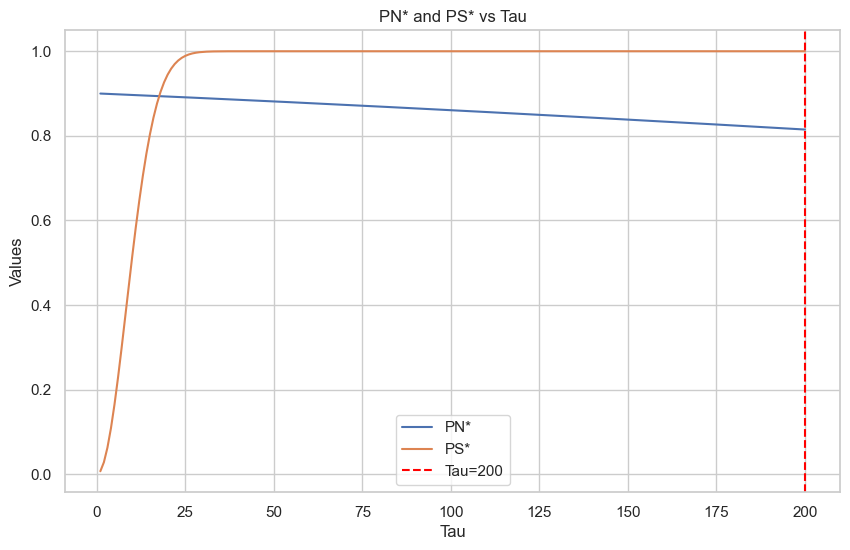

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seaborn-Stil setzen
sns.set_theme(style="whitegrid")

taus = range(1, 201)
PN_stars = []
PS_stars = []
for t in taus:
    _, _, pn, ps = calculate(t)
    PN_stars.append(pn)
    PS_stars.append(ps)
plt.figure(figsize=(10, 6))
sns.lineplot(x=taus, y=PN_stars, label='PN*')
sns.lineplot(x=taus, y=PS_stars, label='PS*')
plt.xlabel('Tau')
plt.ylabel('Values')
plt.title('PN* and PS* vs Tau')
plt.legend()
plt.axvline(x=200, color='red', linestyle='--', label='Tau=200')
plt.legend()